In [2]:
from openbabel import openbabel

In [3]:
from rdkit import Chem
from rdkit.Chem import rdBase
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Descriptors
from rdkit.Chem import Crippen

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as ss

## Defining functions

In [5]:
def molweight(array):
    Smiles = array[0]
    molweight = Chem.Descriptors.MolWt(Chem.MolFromSmiles(Smiles))
    return(molweight)

In [6]:
def CLogP(array):
    Smiles = array[0]
    CLogP = Chem.Crippen.MolLogP(Chem.MolFromSmiles(Smiles))
    return(CLogP)

In [7]:
def TPSA(array):
    Smiles = array[0]
    TPSA = Chem.Descriptors.TPSA(Chem.MolFromSmiles(Smiles))
    return(TPSA)

In [8]:
def num_bins(data): 
    q25, q75 = np.percentile(data,[25,75]) 
    bin_width = 2*(q75 - q25)*len(data)**(-1/3) 
    bins = int(round((data.max() - data.min())/bin_width)) 
    return(bins) 

In [9]:
def trimean(array): 
    trimean = (np.percentile(array, 25) + 2*np.percentile(array, 50) + np.percentile(array, 75)) / 4
    return(trimean) 

In [10]:
def MAD(array): 
    median = np.median(array) 
    data = np.zeros(len(array)) 
    for i in range(len(data)): 
        data[i] = abs(array[i] - median)
    MAD = np.median(data) 
    return(MAD) 

In [11]:
def array_location(array): 
    Mean = np.mean(array)
    Median = np.median(array)
    Trimean = trimean(array)
    return (Mean, Median, Trimean) 

In [12]:
def array_spread(array): 
    SD = np.std(array)
    IQR = ss.iqr(array)
    median = np.median(array)
    Median_absolute_deviation = MAD(array)
    return (SD, IQR, Median_absolute_deviation) 

## Importing data

In [13]:
#data_CHNO_OH = pd.read_csv('./CHNO_Data/OH_Prepped_CHNO_Smiles.tsv', sep='\t')

In [14]:
#data_CHO_OH = pd.read_csv('./CHO_Data/OH_Prepped_CHO_Smiles.tsv', sep='\t')

In [15]:
#%%time
#data_CHNO_OH['Molecular Weight'] = data_CHNO_OH.apply(molweight, axis=1, raw=True, result_type='expand')

In [16]:
#%%time
#data_CHNO_OH['CLogP'] = data_CHNO_OH.apply(CLogP, axis=1, raw=True, result_type='expand')

In [17]:
#%%time
#data_CHNO_OH['TPSA'] = data_CHNO_OH.apply(TPSA, axis=1, raw=True, result_type='expand')

In [18]:
#%%time
#data_CHO_OH['Molecular Weight'] = data_CHO_OH.apply(molweight, axis=1, raw=True, result_type='expand')

In [19]:
#%%time
#data_CHO_OH['CLogP'] = data_CHO_OH.apply(CLogP, axis=1, raw=True, result_type='expand')

In [20]:
#%%time
#data_CHO_OH['TPSA'] = data_CHO_OH.apply(TPSA, axis=1, raw=True, result_type='expand')

In [21]:
#data_CHNO_OH.to_csv(r'c:\data\pandas.txt', header=None, index=None, sep='\t', mode='a')

In [22]:
data_CHNO_OH = pd.read_csv('./CHNO_Data/CHNO_Analysed.tsv', sep='\t')

In [23]:
#data_CHO_OH.to_csv(r'c:\data\pandas.txt', header=None, index=None, sep='\t', mode='a')

In [24]:
data_CHO_OH = pd.read_csv('./CHO_Data/CHO_Analysed.tsv', sep='\t')

## Data plots

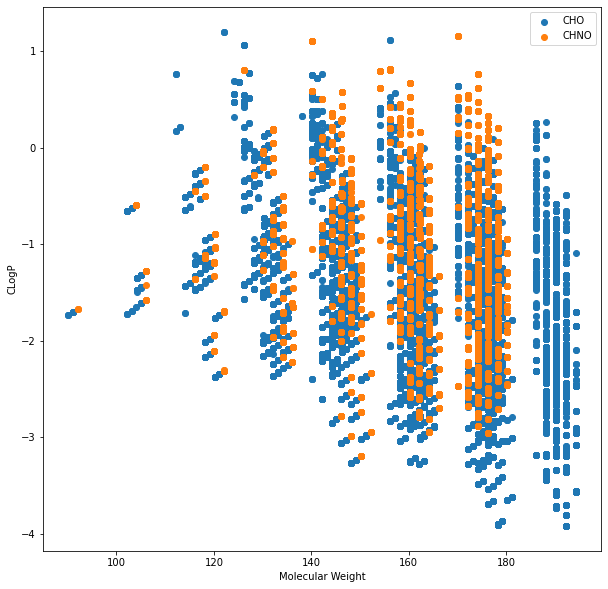

In [25]:
plt.figure(figsize = (10,10))
plt.scatter(data_CHO_OH['Molecular Weight'], data_CHO_OH['CLogP'])
plt.scatter(data_CHNO_OH['Molecular Weight'], data_CHNO_OH['CLogP'])
plt.xlabel('Molecular Weight')
plt.ylabel('CLogP')
plt.legend(['CHO', 'CHNO'])

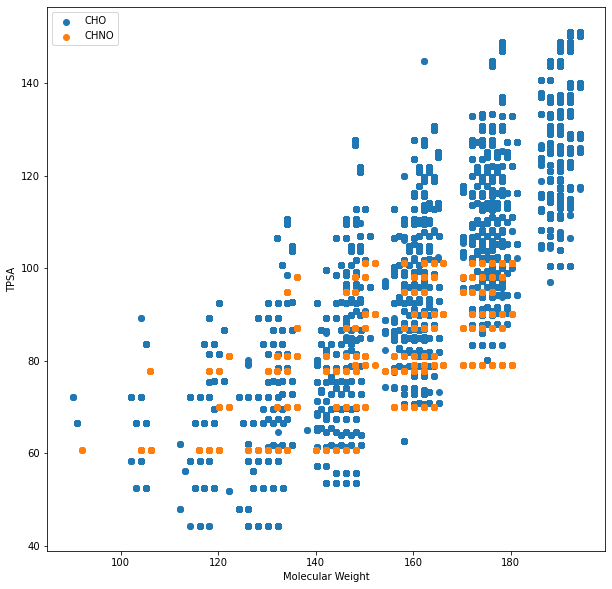

In [26]:
plt.figure(figsize = (10,10))
plt.scatter(data_CHO_OH['Molecular Weight'], data_CHO_OH['TPSA'])
plt.scatter(data_CHNO_OH['Molecular Weight'], data_CHNO_OH['TPSA'])
plt.xlabel('Molecular Weight')
plt.ylabel('TPSA')
plt.legend(['CHO', 'CHNO'])

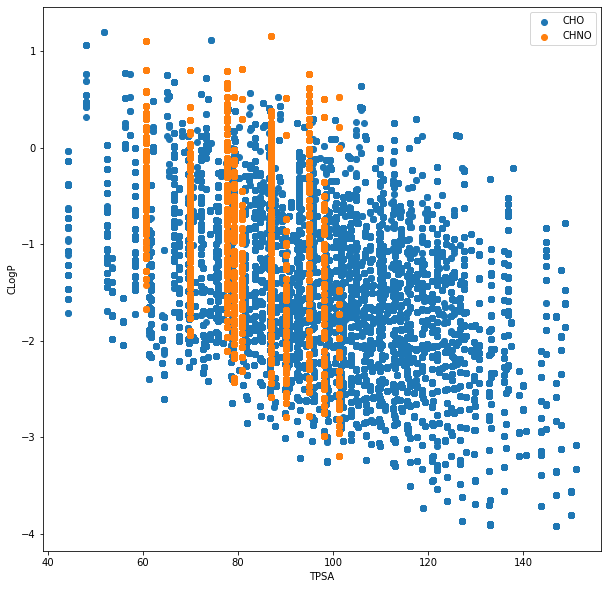

In [27]:
plt.figure(figsize = (10,10))
plt.scatter(data_CHO_OH['TPSA'], data_CHO_OH['CLogP'])
plt.scatter(data_CHNO_OH['TPSA'], data_CHNO_OH['CLogP'])
plt.xlabel('TPSA')
plt.ylabel('CLogP')
plt.legend(['CHO', 'CHNO'])

Text(0.5, 0, 'TPSA')

<Figure size 432x288 with 0 Axes>

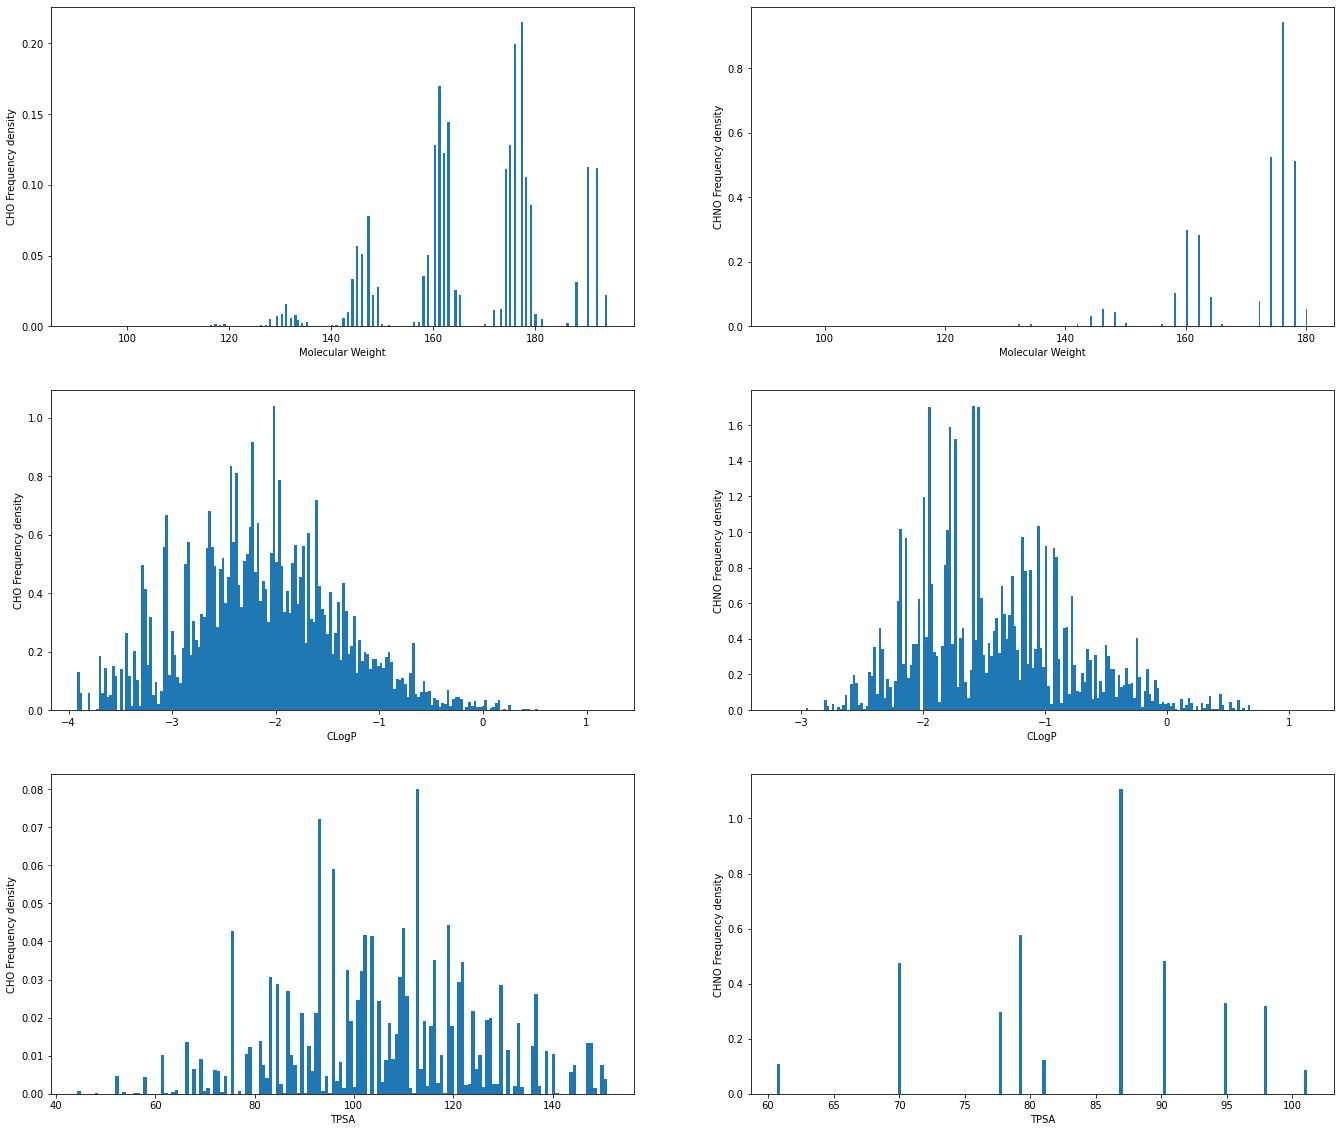

In [28]:
plt.figure()
fig, axes = plt.subplots(nrows=3, ncols=2, figsize = (23,20))

hplot1 = axes[0][0].hist(data_CHO_OH['Molecular Weight'], density=True, bins=num_bins(data_CHO_OH['Molecular Weight']))
hplot2 = axes[1][0].hist(data_CHO_OH['CLogP'], density=True, bins=num_bins(data_CHO_OH['CLogP']))
hplot3 = axes[2][0].hist(data_CHO_OH['TPSA'], density=True, bins=num_bins(data_CHO_OH['TPSA']))

hplot4 = axes[0][1].hist(data_CHNO_OH['Molecular Weight'], density=True, bins=num_bins(data_CHNO_OH['Molecular Weight']))
hplot5 = axes[1][1].hist(data_CHNO_OH['CLogP'], density=True, bins=num_bins(data_CHNO_OH['CLogP']))
hplot6 = axes[2][1].hist(data_CHNO_OH['TPSA'], density=True, bins=num_bins(data_CHNO_OH['TPSA']))

axes[0][0].set_ylabel('CHO Frequency density')
axes[0][0].set_xlabel('Molecular Weight')

axes[1][0].set_ylabel('CHO Frequency density')
axes[1][0].set_xlabel('CLogP')

axes[2][0].set_ylabel('CHO Frequency density')
axes[2][0].set_xlabel('TPSA')

axes[0][1].set_ylabel('CHNO Frequency density')
axes[0][1].set_xlabel('Molecular Weight')

axes[1][1].set_ylabel('CHNO Frequency density')
axes[1][1].set_xlabel('CLogP')

axes[2][1].set_ylabel('CHNO Frequency density')
axes[2][1].set_xlabel('TPSA')

## Data Analysis

### Mean, Median, Trimean

In [29]:
array_location(data_CHO_OH['Molecular Weight'])

(168.18060431058493, 174.15599999999998, 171.41025)

In [30]:
array_location(data_CHNO_OH['Molecular Weight'])

(170.53996994717335, 174.15200000000002, 171.66425)

In [31]:
array_location(data_CHO_OH['CLogP'])

(-2.1254834838945804, -2.1612, -2.1475499999999994)

In [32]:
array_location(data_CHNO_OH['CLogP'])

(-1.4195021291807932, -1.5286, -1.495125)

In [33]:
array_location(data_CHO_OH['TPSA'])

(106.03764038865701, 106.86, 106.45)

In [34]:
array_location(data_CHNO_OH['TPSA'])

(84.39087540802649, 86.99000000000001, 85.82000000000001)

### SD, IQR, Median

In [35]:
array_spread(data_CHO_OH['Molecular Weight'])

(14.80496561860308, 16.983000000000004, 11.966999999999985)

In [36]:
array_spread(data_CHNO_OH['Molecular Weight'])

(9.230559385914137, 13.983000000000004, 2.016000000000048)

In [37]:
array_spread(data_CHO_OH['CLogP'])

(0.7387911992154222, 0.9790000000000016, 0.4783700000000013)

In [38]:
array_spread(data_CHNO_OH['CLogP'])

(0.6228448549619688, 0.9140999999999999, 0.41759999999999975)

In [39]:
array_spread(data_CHO_OH['TPSA'])

(19.504740692260494, 26.519999999999996, 13.989999999999995)

In [40]:
array_spread(data_CHNO_OH['TPSA'])

(9.247652258303647, 11.0, 7.839999999999989)

## Comparison with network output

In [74]:
data_canonical_CHNO = pd.read_csv('./CHNO_Data/Canonical_CHNO.tsv', sep='\t')

In [75]:
data_canonical_CHO = pd.read_csv('./CHO_Data/Canonical_CHO.tsv', sep='\t')

In [76]:
data_canonical_formose = pd.read_csv('./Formose_Canonical.tsv', sep='\t')

In [77]:
data_canonical_glucose = pd.read_csv('./Glucose_Canonical.tsv', sep='\t')

In [87]:
formose_codes = []
for i in range(len(data_canonical_formose['Canonical Code'])):
    formose_codes.append(data_canonical_formose['Canonical Code'][i])

In [136]:
glucose_codes = []
for i in range(len(data_canonical_glucose['Canonical Code'])):
    glucose_codes.append(data_canonical_glucose['Canonical Code'][i])

In [95]:
CHNO_codes = []
for i in range(len(data_canonical_CHNO['Canonical Code'])):
    CHNO_codes.append(data_canonical_CHNO['Canonical Code'][i])

In [119]:
CHO_codes = []
for i in range(len(data_canonical_CHO['Canonical Code'])):
    CHO_codes.append(data_canonical_CHO['Canonical Code'][i])

In [114]:
%%time
formose_CHNO_matches = []
for i in range(len(formose_codes)):
    if formose_codes[i] in CHNO_codes:
        formose_CHNO_matches.append(formose_codes[i])

CPU times: user 8min 15s, sys: 612 ms, total: 8min 16s
Wall time: 8min 17s


In [121]:
%%time
formose_data = pd.read_csv('Formose_smile.tsv', sep='\t')
formose_CHNO_smiles = []
for i in range(len(formose_CHNO_matches)):
    for j in range(len(formose_data['Canonical Code'])):
        if formose_CHNO_matches[i] == formose_data['Canonical Code'][j]:
            formose_CHNO_smiles.append(formose_data['Smiles'][j])

CPU times: user 8.67 s, sys: 18 ms, total: 8.68 s
Wall time: 8.75 s


In [124]:
formose_CHNO_data = {'Smiles': formose_CHNO_smiles, 'Canonical Code': formose_CHNO_matches}
formose_CHNO = pd.DataFrame(formose_CHNO_data)

In [135]:
#formose_CHNO.to_csv(r'c:\data\pandas.txt', header=None, index=None, sep='\t', mode='a')

In [120]:
%%time
formose_CHO_matches = []
for i in range(len(formose_codes)):
    if formose_codes[i] in CHO_codes:
        formose_CHO_matches.append(formose_codes[i])

CPU times: user 9min 56s, sys: 1.5 s, total: 9min 57s
Wall time: 10min 2s


In [123]:
%%time
formose_CHO_smiles = []
for i in range(len(formose_CHO_matches)):
    for j in range(len(formose_data['Canonical Code'])):
        if formose_CHO_matches[i] == formose_data['Canonical Code'][j]:
            formose_CHNO_smiles.append(formose_data['Smiles'][j])

CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 7.87 µs


In [125]:
formose_CHO_data = {'Smiles': formose_CHO_smiles, 'Canonical Code': formose_CHO_matches}
formose_CHO = pd.DataFrame(formose_CHO_data)

In [149]:
%%time
glucose_CHNO_matches = []
for i in range(len(glucose_codes)):
    if glucose_codes[i] in CHNO_codes:
        glucose_CHNO_matches.append(glucose_codes[i])

CPU times: user 9min 27s, sys: 1.99 s, total: 9min 29s
Wall time: 9min 33s


In [150]:
%%time
glucose_data = pd.read_csv('Glucose_smile.tsv', sep='\t')
glucose_CHNO_smiles = []
glucose_CHNO_generations = []
for i in range(len(glucose_CHNO_matches)):
    for j in range(len(glucose_data['Canonical Code'])):
        if glucose_CHNO_matches[i] == glucose_data['Canonical Code'][j]:
            glucose_CHNO_smiles.append(glucose_data['Smiles'][j])
            glucose_CHNO_generations.append(glucose_data['Generation'][j])

CPU times: user 7.61 s, sys: 71.1 ms, total: 7.69 s
Wall time: 8.03 s


In [155]:
glucose_CHNO_data = {'Generation': glucose_CHNO_generations, 'Smiles': glucose_CHNO_smiles, 'Canonical Code': glucose_CHNO_matches}
glucose_CHNO = pd.DataFrame(glucose_CHNO_data)

In [156]:
#glucose_CHNO.to_csv(r'c:\data\pandas.txt', header=None, index=None, sep='\t', mode='a')

In [138]:
%%time
glucose_CHO_matches = []
for i in range(len(glucose_codes)):
    if glucose_codes[i] in CHO_codes:
        glucose_CHO_matches.append(glucose_codes[i])

CPU times: user 12min 40s, sys: 2.77 s, total: 12min 43s
Wall time: 13min 18s


In [143]:
%%time
glucose_data = pd.read_csv('Glucose_smile.tsv', sep='\t')
glucose_CHO_smiles = []
glucose_CHO_generations = []
for i in range(len(glucose_CHO_matches)):
    for j in range(len(glucose_data['Canonical Code'])):
        if glucose_CHO_matches[i] == glucose_data['Canonical Code'][j]:
            glucose_CHO_smiles.append(glucose_data['Smiles'][j])
            glucose_CHO_generations.append(glucose_data['Generation'][j])

CPU times: user 6.24 s, sys: 25.8 ms, total: 6.26 s
Wall time: 6.3 s


In [146]:
glucose_CHO_data = {'Generation': glucose_CHO_generations, 'Smiles': glucose_CHO_smiles, 'Canonical Code': glucose_CHO_matches}
glucose_CHO = pd.DataFrame(glucose_CHO_data)

In [148]:
#glucose_CHO.to_csv(r'c:\data\pandas.txt', header=None, index=None, sep='\t', mode='a')